一.比賽介紹

比賽名稱: TMDB Box Office Prediction

比賽目標: 預測票房收益


比賽簡介:

隨著電影產業的蓬勃發展，每家製作商為了能夠賺錢，勢必要考量到預算的掌握，和票房的預估，但是實際上影響票房的未必只有預算，實際上可能是很多種因素互相影響，所以在提供多種數據的情況下，是否能夠更準確的預估出最終票房，對於產業的發展，與製作電影的預估，會有很大的關係。這次提供的Dataset有超過七千筆的過去電影票房，並包含 cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries等超過20種電影製作的相關欄位。利用這個訓練模型，預估出4398電影的票房收益。出來的結果數據，越低代表差異性越小，準確率越高。目前第一名，結果數據最低來到0.6左右


參加目的:

我會參加這個項目有兩個原因，第一個是因為符合我們課堂目前的上課內容，在找尋挑戰的過程中發現，kaggle的挑戰有相當多個，但是相對的題目的組成也會相對複雜，實際上點進去看會發現有許多的題目牽涉到的不會只有csv檔，有可能會搭配json或是其他種檔案類型，這導致要找到符合的挑戰內容，相當的困難，再加上內容的實做也要符合上課內容所學的，所以就需要過濾一些挑戰，雖然老師有提供一些基礎的挑戰可以來參加，但是我自己想要當個與眾不同的人，所以自己額外費心努力的尋找，才找到這個蠻符合我們上課內容的挑戰。第二個原因是因為我個人蠻喜歡看電影的，對於票房的預估其實一直都很有興趣，我自己平常也會常關心台灣的電影票房，所以藉由這次的機會，正好可以把自己平常所觀察到的想法和觀點，帶入到這次的挑戰中，或許能夠意外的準確預測票房成績。


資料集:

trainData有7398 movies,23個欄位

testData有4398 movies,22個欄位(缺少revenue,因為這個是要預測的)

submission需要id名稱搭配revenue預測結果




延伸知識:

這次的dataset是由美國TMDB(The Movie DataBase)提供的，他除了提供過去的電影資料，他也有提供關於TV show的相關收視率資料。而且他所提供的API可以連接許多的detail資訊，像是所有參與的演員有誰，工作人員有誰等平常比較難得到的資訊，都能透過TMDB拿到。是個電影界的維基百科。



二.程式實作

新增modules

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

新增train data

In [80]:
df = pd.read_csv("train.csv")

查看data全貌

In [81]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


查看data相關數據(請特別注意有哪些缺失值!)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [83]:
df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


開始整理數據，我們先鎖定"genres","production_companies","production_countries,"spoken_language","keywords","cast","crew"，因為可以看到這些欄位都是由很多個東西組成的，我們希望能將這些東西拆開成可以看懂的數據，並保留我們想要的資料。例如，genres的第一個是comedy，但是我們可以看到裡面包含了id和name等不需要的東西(直觀上我們不會想要看到id和name，我們想要直接看到類型，是fiction還是action還是comedy等，所以如果數據能直接顯示是什麼類型，我覺得會是最好的，所以我認為那些是不必要的東西)，所以我們的目標是將那些東西刪除，保留關鍵字就好，其他欄位同理，以下為整理欄位的程式碼

甚麼是ast?

在 Python 中，ast 是抽象語法樹（Abstract Syntax Tree）模組的縮寫。它是一個內建模組，用於將 Python 程序解析成抽象語法樹的形式，從而便於進行分析、轉換、優化等操作。抽象語法樹是一種以層次化的方式表示程式碼語法結構的數據結構。在抽象語法樹中，每個節點代表一個語法結構，如變量、函數調用、迴圈、條件語句等等，子節點則對應該結構中的子結構。
使用 ast 模組，我們可以將 Python 程序解析成抽象語法樹的形式，然後對其進行遍歷、分析、修改等操作，最後再將其轉換回 Python 程序。這個過程在許多場景中都非常有用，例如：代碼優化、代碼風格檢查、代碼混淆、代碼重構等等。
總之，ast 模組是一個用於解析 Python 程序，並生成其抽象語法樹表示的模組。通過這個模組，我們可以對 Python 程序進行更深入的分析和操作。


以上參考chatgpt的解釋

甚麼是literal_eval ?

在 Python 的 ast 模組中，literal_eval 函數是一個用於安全地解析字面量表達式的函數。字面量表達式指的是那些可以被直接評估為 Python 數據類型的表達式，例如：字串、數字、列表、字典等等。

literal_eval 函數可以把一個字符串解析成 Python 對象，但只會解析字面量表達式，而不會執行任何其他代碼。因此，它比 eval 函數更加安全，因為 eval 函數可以執行任何代碼，包括危險的代碼，因此可能會造成安全風險。


參考chatgpt的解釋，大致上就是將字串形式的其他型態轉換成原本的型態。例如有一個字串型態的list，那這個函式就會將這個字串轉換成list，回歸到原本的型態

那我會想要用這個的原因是因為這些欄位都是很亂的資料類型，所以如果我簡單整理一下，就能將雜亂的樣子變成乾淨的型態，以下的輸出結果就是整理後的樣子

ast延伸學習:

(dict用法和意思) : https://shengyu7697.github.io/python-dict/

(ast.literal_eval的用法和意思) : https://docs.python.org/2/library/ast.html

(ast的用法和解釋) : https://blog.csdn.net/ThinkTimes/article/details/110831176


開始跑資料，確認有無缺失資料(pd.isna(x))，然後如果有資料缺失則將資料設定成空的"{}"字典型態，如果資料無缺失，則透過ast.literal_eval(x)將字串轉換成原有型態

例如原本有資料長這樣 :

column1	                  

'{1: "one"}'

NaN

NaN

'[2, 3, 4]'

'{}'	

'{5: "five", 6: 6}'        


經過這段程式之後，就換變成這樣

column1

{1: "one"}	   

{}	            

{}	   

{5: "five", 6: 6}

[2, 3, 4]

{}


這樣的結果就是我希望我的表格會轉成的樣子，因為我要先把缺失的資料處理，剩下的都先轉換成原本的型態，之後再透過其他程式再把裡面不需要的元素剃除整理(就是上面我所說的不需要的id和name)


In [84]:
import ast
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
for col in dict_cols:
    df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

處理剩下的缺失資料(df.isna().any())，這段程式會幫我標記缺失的地方(tolist())

In [85]:
na_cols = df.columns[df.isna().any()].tolist()


In [86]:
print(na_cols)

['belongs_to_collection', 'homepage', 'overview', 'poster_path', 'runtime', 'tagline']


runtime要補齊資料，所以要另外處理，並將空的以runtime的平均補進去，剩下
都補空格就好了

In [87]:
na_cols.remove('runtime')
df['runtime'].fillna(value=df['runtime'].median(), inplace=True)
for col in na_cols:    
    df[col].fillna(value='', inplace=True)

將json格式data裡的"name"欄取出(if else)，並更新表格(for迴圈)

In [88]:
def get_names(x, col):

    names = []
    for item in x:
        names.append(item['name'])
    return names
    
for col in dict_cols:
    df[col] = df[col].apply(lambda x: get_names(x, col))

In [89]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435
2,3,,3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000
3,4,,1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000
4,5,,0,"[Action, Thriller]",,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970


處理完缺失的資料，接下來開始處理每一欄，並保留有用的(從前面開始處理)

1. "belongs_to_collection"
我覺得對票房不影響，刪除

In [90]:
df.drop(['belongs_to_collection'], axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3000 non-null   int64  
 1   budget                3000 non-null   int64  
 2   genres                3000 non-null   object 
 3   homepage              3000 non-null   object 
 4   imdb_id               3000 non-null   object 
 5   original_language     3000 non-null   object 
 6   original_title        3000 non-null   object 
 7   overview              3000 non-null   object 
 8   popularity            3000 non-null   float64
 9   poster_path           3000 non-null   object 
 10  production_companies  3000 non-null   object 
 11  production_countries  3000 non-null   object 
 12  release_date          3000 non-null   object 
 13  runtime               3000 non-null   float64
 14  spoken_languages      3000 non-null   object 
 15  status               

2. "budget"
我們觀察一下budget

(array([1.49e+03, 3.96e+02, 2.11e+02, 2.20e+02, 9.40e+01, 1.28e+02,
        7.30e+01, 7.30e+01, 4.00e+01, 4.90e+01, 3.30e+01, 3.80e+01,
        1.00e+01, 3.10e+01, 1.10e+01, 1.40e+01, 7.00e+00, 1.40e+01,
        3.00e+00, 1.70e+01, 1.00e+00, 7.00e+00, 3.00e+00, 7.00e+00,
        2.00e+00, 5.00e+00, 7.00e+00, 2.00e+00, 1.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 5.00e+00, 0.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([0.000e+00, 7.600e+06, 1.520e+07, 2.280e+07, 3.040e+07, 3.800e+07,
        4.560e+07, 5.320e+07, 6.080e+07, 6.840e+07, 7.600e+07, 8.360e+07,
        9.120e+07, 9.880e+07, 1.064e+08, 1.140e+08, 1.216e+08, 1.292e+08,
        1.368e+08, 1.444e+08, 1.520e+08, 1.596e+08, 1.672e+08, 1.748e+08,
        1.824e+08, 1.900e+08, 1.976e+08, 2.052e+08, 2.128e+08, 2.204e+08,
        2.280e+08, 2.356e+08, 2.432e+08, 2.508e+08, 2.58

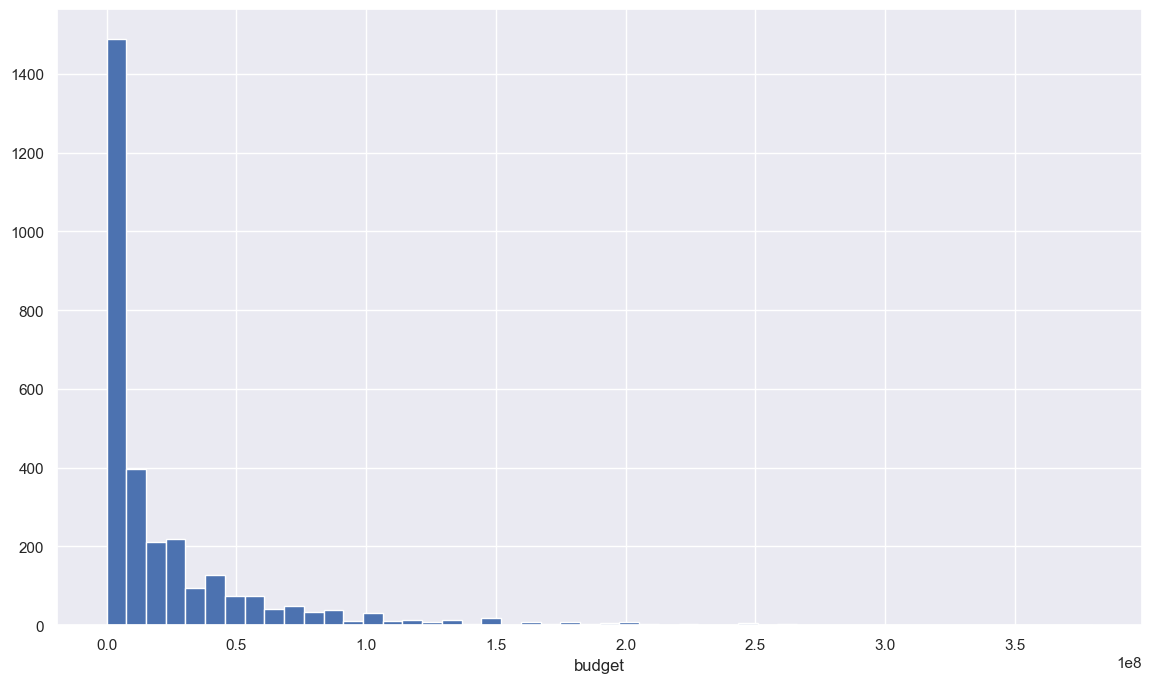

In [91]:
sns.set(rc = {'figure.figsize':(14,8)}) #調整圖形的大小
plt.xlabel('budget')
plt.hist(df['budget'], bins=50)  #bin 箱子的數量(長條圖)

我們看一下budget跟revenue的關係

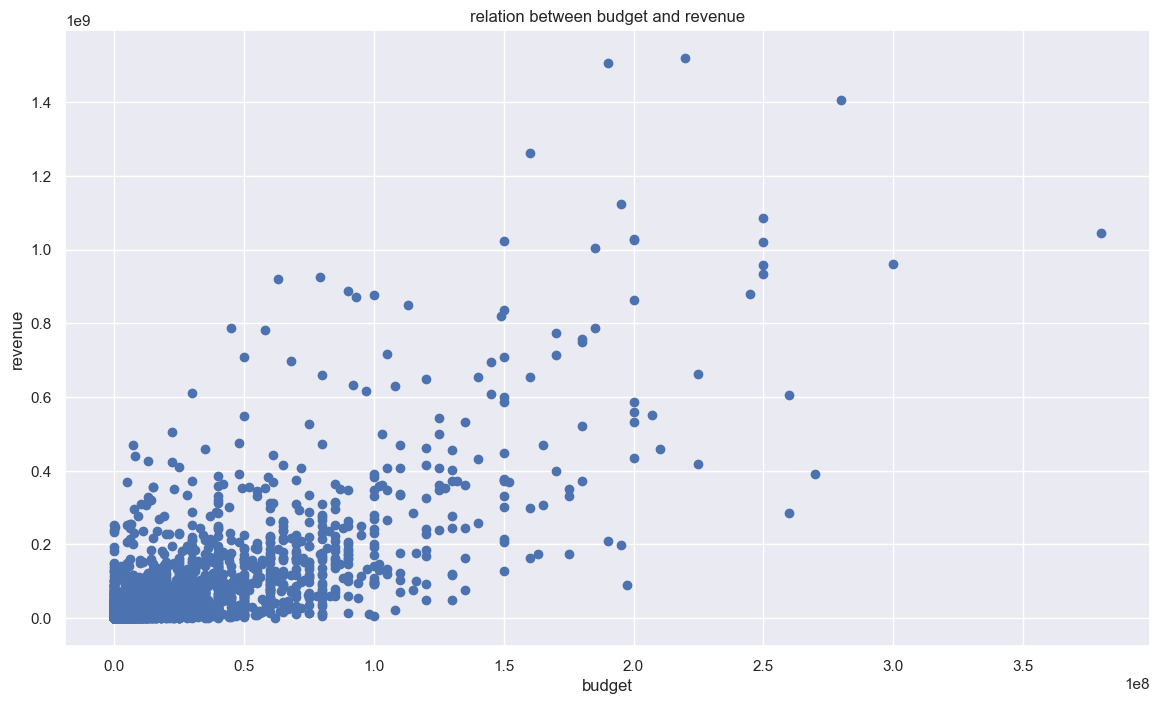

In [92]:
plt.title('relation between budget and revenue')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.scatter(x=df['budget'], y=df['revenue'])

In [93]:
df['budget'].describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

發現到呈現正相關，也就是buget又高通常收益越高，所以我們應該考慮budet影響到revenue的重要性，另外也發現到低成本的都擠在一起，不太好辨識，而且低成本的電影可能低到一個程度後或許不影響票房，所以我們試著把低成本的調整數據

In [94]:
#budget < 10000
len(df[df['budget'] < 10000])

835

In [95]:
#budget < 50000
len(df[df['budget'] < 50000])

843

將低成本的數據汰換成平均數，從結果得知我們成功把低成本的來高一些(參考describe()的結果)

In [96]:
mean = df['budget'].mean()
df['budget'] = df['budget'].apply(lambda x : x+mean if x<50000 else x)
df['budget'].describe()

count    3.000000e+03
mean     2.886264e+07
std      3.446933e+07
min      5.000000e+04
25%      1.000000e+07
50%      2.253133e+07
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

3. "genres"  計算有幾個genres，數量會影響票房

In [97]:
df['genre_count'] = df['genres'].apply(lambda x: len(x))
df.drop(['genres'], axis=1, inplace=True)

In [98]:
df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count
0,1,14000000.00,,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",...,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1
1,2,40000000.00,,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],...,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4
2,3,3300000.00,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",...,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1
3,4,1200000.00,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],...,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2
4,5,22531334.11,,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],...,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2


4. "homepage"不影響票房丟掉

In [99]:
df.drop(['homepage'], axis=1, inplace=True)

In [100]:
df.head()

,id,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count
0,1,14000000.00,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],...,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1
1,2,40000000.00,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],...,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4
2,3,3300000.00,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],...,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1
3,4,1200000.00,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],...,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2
4,5,22531334.11,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],...,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2


5. "imdb_id"不影響票房丟掉

In [101]:
df.drop(['imdb_id'], axis=1, inplace=True)

In [102]:
df.head()

,id,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count
0,1,14000000.00,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1
1,2,40000000.00,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4
2,3,3300000.00,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1
3,4,1200000.00,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2
4,5,22531334.11,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/09,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2


6. "original_language"是不是英文的似乎占了很大的影響成分在，所以我們選擇挑出"有英文"的和"沒有英文"的進行比較

(array([2.575e+03, 4.200e+01, 2.000e+01, 0.000e+00, 1.000e+00, 7.800e+01,
        0.000e+00, 2.400e+01, 6.000e+00, 0.000e+00, 1.900e+01, 4.300e+01,
        1.000e+00, 0.000e+00, 1.600e+01, 2.000e+01, 0.000e+00, 4.700e+01,
        3.000e+00, 0.000e+00, 3.700e+01, 5.000e+00, 8.000e+00, 0.000e+00,
        1.800e+01, 2.000e+00, 0.000e+00, 6.000e+00, 1.000e+00, 0.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,
         7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. , 14.7,
        15.4, 16.1, 16.8, 17.5, 18.2, 18.9, 19.6, 20.3, 21. , 21.7, 22.4,
        23.1, 23.8, 24.5, 25.2, 25.9, 26.6, 27.3, 28. , 28.7, 29.4, 30.1,
        30.8, 31.5, 32.2, 32.9, 33.6, 34.3, 35. ]),
 <BarContainer object of 50 

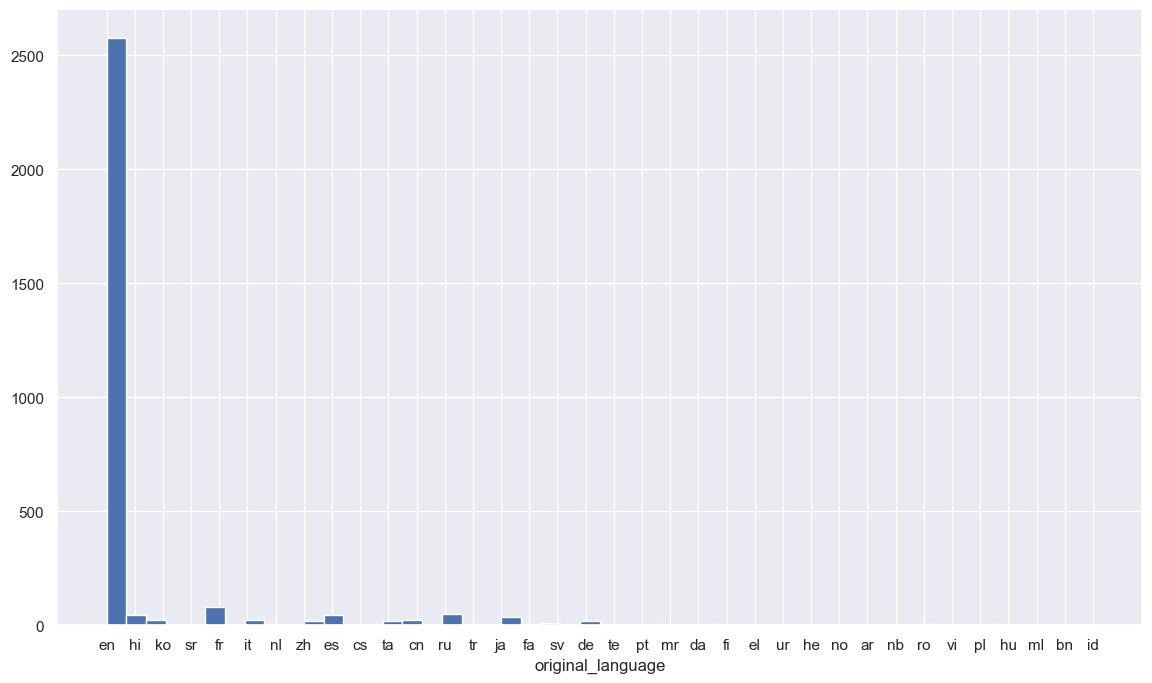

In [103]:
sns.set(rc = {'figure.figsize':(14,8)}) 
plt.xlabel('original_language')
plt.hist(df['original_language'], bins=50)  

In [104]:
for i in df['original_language']:
    if(i=='en'):
        df['Has_En']=1
    else:
        df['Has_En']=0

df.drop(['original_language'], axis=1, inplace=True)

In [105]:
df.head()

,id,budget,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En
0,1,14000000.00,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1
1,2,40000000.00,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1
2,3,3300000.00,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1
3,4,1200000.00,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1
4,5,22531334.11,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/09,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1


7. "original_title"不影響票房丟掉

In [106]:
df.drop(['original_title'], axis=1, inplace=True)

In [107]:
df.head()

,id,budget,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En
0,1,14000000.00,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1
1,2,40000000.00,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1
2,3,3300000.00,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1
3,4,1200000.00,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1
4,5,22531334.11,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/09,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1


8. "overview"不影響票房丟掉

In [108]:
df.drop(['overview'], axis=1, inplace=True)

In [109]:
df.head()

,id,budget,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En
0,1,14000000.00,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1
1,2,40000000.00,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1
2,3,3300000.00,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1
3,4,1200000.00,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1
4,5,22531334.11,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/09,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1


9. "popularity"會影響票房，畢竟人氣越高，revenue應該也會跟著提升，所以用圖先看影響程度，但因為本身是數值了，所以不需要更動數據

In [110]:
df['popularity'].isnull().sum()

0

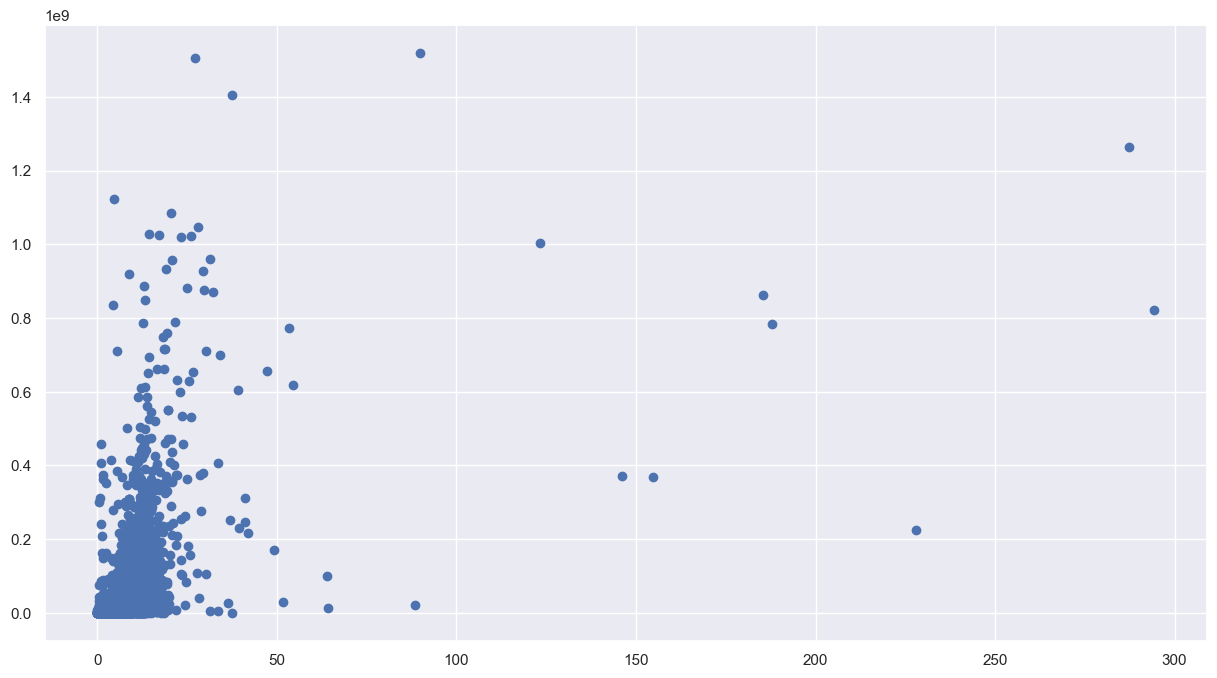

In [111]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.scatter('popularity','revenue',data=df)

10. "poster_path"不影響票房，刪除

In [112]:
df.drop(['poster_path'], axis=1, inplace=True)

In [113]:
df.head()

,id,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En
0,1,14000000.00,6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1
1,2,40000000.00,8.248895,[Walt Disney Pictures],[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1
2,3,3300000.00,64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1
3,4,1200000.00,3.174936,[],[India],3/9/12,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1
4,5,22531334.11,1.148070,[],[South Korea],2/5/09,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1


11. "production_companies"，對我來說，參與公司的數量也影響著票房，因為多公司聯合出品，很可能是因為是大作品才聯手合作，而大作品通常都有著好的票房，所以我認為多少會影響revenue，選擇保留數量的數據

In [114]:
df['production_companies_count'] = df['production_companies'].apply(lambda x: len(x))
means = df['production_companies_count'].mean()
df["production_companies_count"] = df["production_companies_count"].apply(lambda x : x+means if x==0 else x)
df.drop(['production_companies'], axis=1, inplace=True)

In [115]:
df.head()

,id,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En,production_companies_count
0,1,14000000.00,6.575393,[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1,3.000000
1,2,40000000.00,8.248895,[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1,1.000000
2,3,3300000.00,64.299990,[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1,3.000000
3,4,1200000.00,3.174936,[India],3/9/12,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1,2.698333
4,5,22531334.11,1.148070,[South Korea],2/5/09,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1,2.698333


12. "production_countries" 多餘的數據，因為這項數據跟語言也有相關，所以就不保留這項

In [116]:
df.drop(['production_countries'], axis=1, inplace=True)

In [117]:
df.head()

,id,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En,production_companies_count
0,1,14000000.00,6.575393,2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1,3.000000
1,2,40000000.00,8.248895,8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1,1.000000
2,3,3300000.00,64.299990,10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1,3.000000
3,4,1200000.00,3.174936,3/9/12,122.0,"[English, हिन्दी]",Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1,2.698333
4,5,22531334.11,1.148070,2/5/09,118.0,[한국어/조선말],Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1,2.698333


14. "spoken_languages"，愈多個語言，或許能拓展到更多市場，票房或許能夠增長，所以我們把每部的語言計數

In [118]:
df['spoken_languages_count'] = df['spoken_languages'].apply(lambda x: len(x))
df.drop(['spoken_languages'], axis=1, inplace=True)

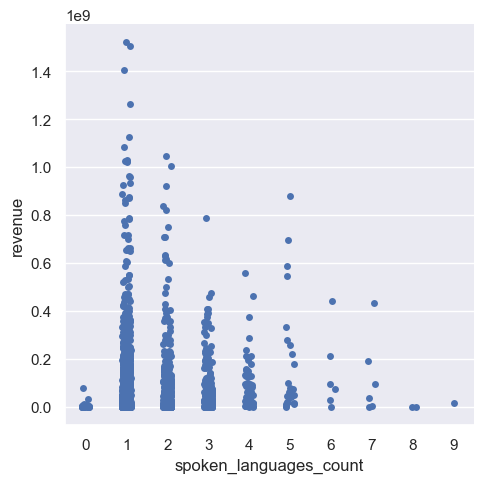

In [119]:
sns.catplot(x='spoken_languages_count', y='revenue', data=df)

In [120]:
df.head()

,id,budget,popularity,release_date,runtime,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En,production_companies_count,spoken_languages_count
0,1,14000000.00,6.575393,2/20/15,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1,3.000000,1
1,2,40000000.00,8.248895,8/6/04,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1,1.000000,1
2,3,3300000.00,64.299990,10/10/14,105.0,Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1,3.000000,1
3,4,1200000.00,3.174936,3/9/12,122.0,Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1,2.698333,2
4,5,22531334.11,1.148070,2/5/09,118.0,Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1,2.698333,1


15. "release_date"，我們試著把date拆開，拆成年、月、日，並用圖表呈現和revenue的關係

In [121]:
df['release_date'].isnull().sum()

0

In [122]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
df["release_year"] = pd.to_datetime(df["release_date"]).dt.year.astype(int)
df["release_day"] = pd.to_datetime(df["release_date"]).dt.dayofweek.astype(int)
df["release_month"] = pd.to_datetime(df["release_date"]).dt.month.astype(int)

In [123]:
df['release_year'].max()

2068

今年2023年，2068不合理要剃除

In [124]:
def fix_date(x):
    if x > 2023:
        return 2023
    else:
        return x 

In [125]:
df['release_year'] = df['release_year'].apply(lambda x: fix_date(x))

In [126]:
df.drop(['release_date'], axis=1, inplace=True)

In [127]:
df.head()

,id,budget,popularity,runtime,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En,production_companies_count,spoken_languages_count,release_year,release_day,release_month
0,1,14000000.00,6.575393,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1,3.000000,1,2015,4,2
1,2,40000000.00,8.248895,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1,1.000000,1,2004,4,8
2,3,3300000.00,64.299990,105.0,Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1,3.000000,1,2014,4,10
3,4,1200000.00,3.174936,122.0,Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1,2.698333,2,2012,4,3
4,5,22531334.11,1.148070,118.0,Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1,2.698333,1,2009,3,2


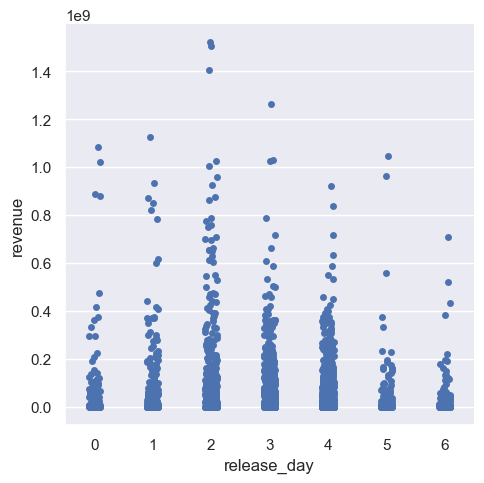

In [128]:
sns.catplot(x='release_day',y='revenue',data=df)

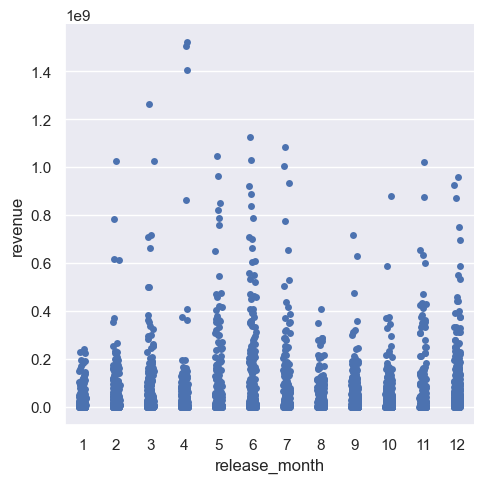

In [129]:
sns.catplot(x='release_month',y='revenue',data=df)

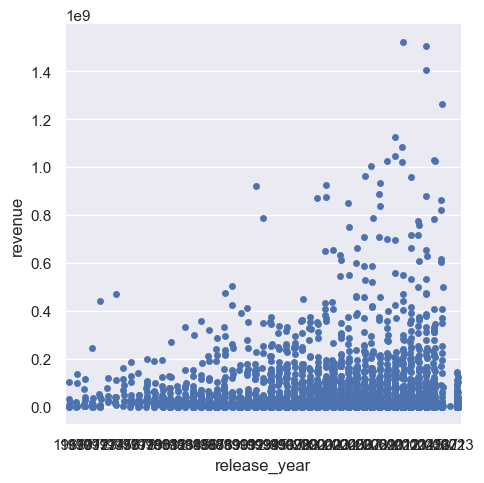

In [130]:
sns.catplot(x='release_year',y='revenue',data=df)

(array([ 44.,  56., 171., 238., 256., 391., 454., 687., 557., 146.]),
 array([1969. , 1974.4, 1979.8, 1985.2, 1990.6, 1996. , 2001.4, 2006.8,
        2012.2, 2017.6, 2023. ]),
 <BarContainer object of 10 artists>)

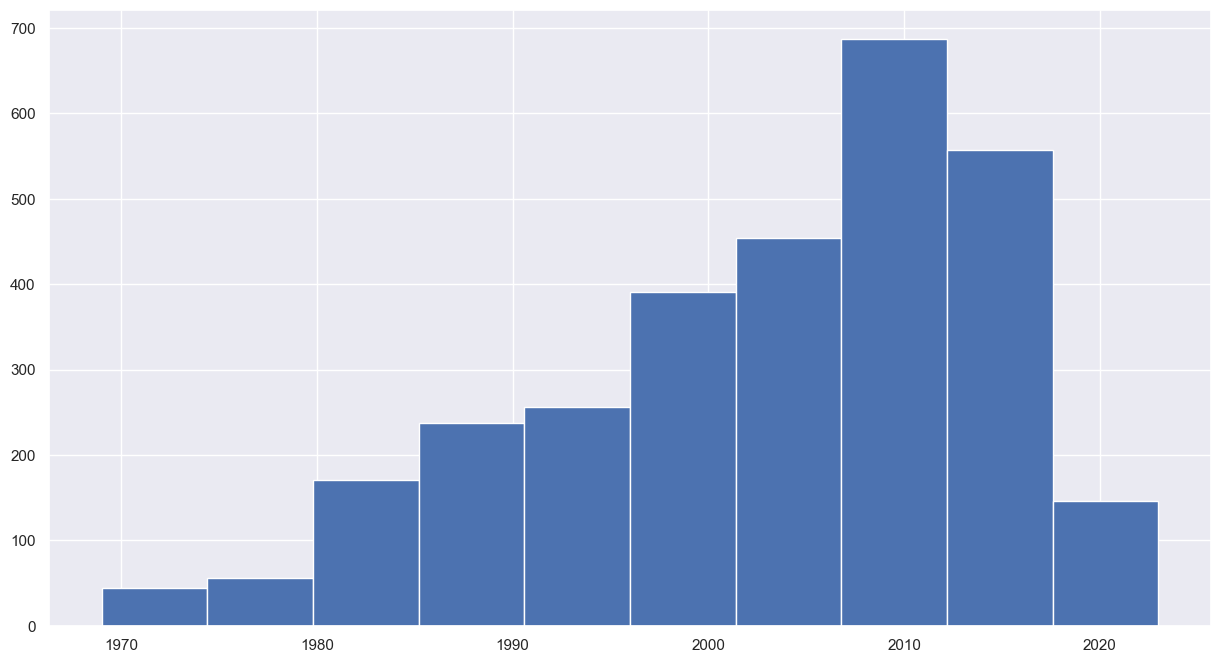

In [131]:
plt.hist('release_year',data=df)

從圖表大概可以得知幾件事，年份近期的票房會比較好，月跟日似乎影響成分不大，因為分布的還算平均，所以可能之後考慮的點可能會是年分

16. "runtime"上映時間越長，愈有機會賺更多錢

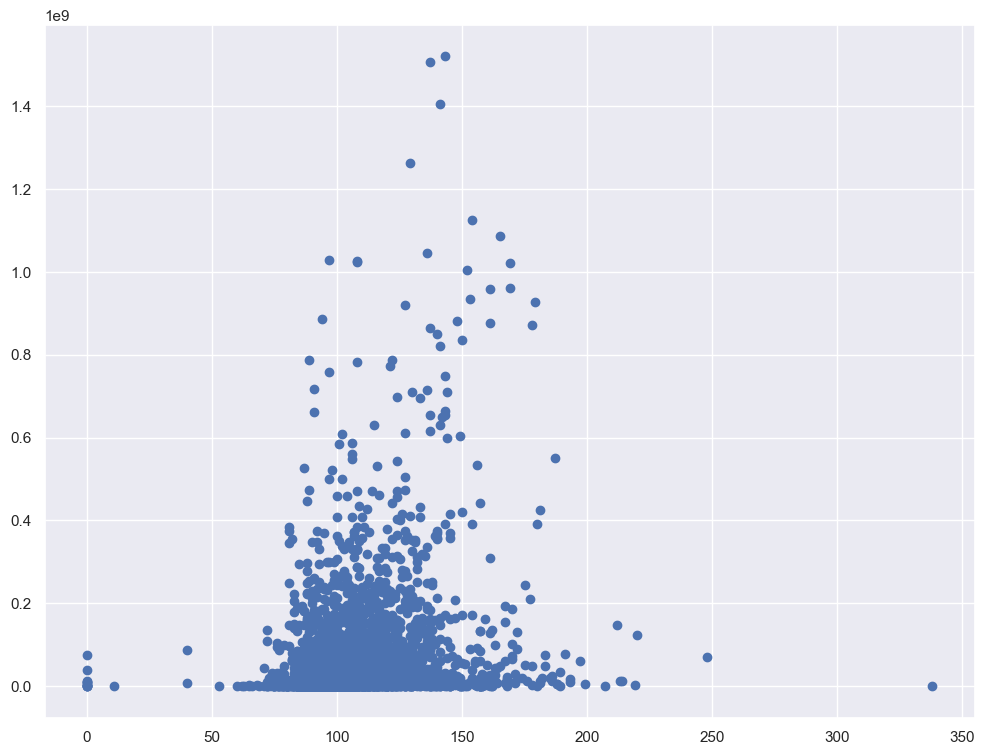

In [132]:
plt.subplots(figsize=(12, 9))
plt.scatter('runtime','revenue',data=df)

In [133]:
df.head()

,id,budget,popularity,runtime,status,tagline,title,Keywords,cast,crew,revenue,genre_count,Has_En,production_companies_count,spoken_languages_count,release_year,release_day,release_month
0,1,14000000.00,6.575393,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1,3.000000,1,2015,4,2
1,2,40000000.00,8.248895,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1,1.000000,1,2004,4,8
2,3,3300000.00,64.299990,105.0,Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1,3.000000,1,2014,4,10
3,4,1200000.00,3.174936,122.0,Released,,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1,2.698333,2,2012,4,3
4,5,22531334.11,1.148070,118.0,Released,,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1,2.698333,1,2009,3,2


17. "status"不影響票房，刪除

In [134]:
df.drop(['status'], axis=1, inplace=True)

18. "tagline"不影響票房，刪除

In [135]:
df.drop(['tagline'], axis=1, inplace=True)

19. "keywords"多寡跟票房感覺沒關係，所以刪除

In [136]:
df.drop(['Keywords'], axis=1, inplace=True)

20. "title"跟票房無關，刪除

In [137]:
df.drop(['title'], axis=1, inplace=True)

In [138]:
df.head()

,id,budget,popularity,runtime,cast,crew,revenue,genre_count,Has_En,production_companies_count,spoken_languages_count,release_year,release_day,release_month
0,1,14000000.00,6.575393,93.0,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651,1,1,3.000000,1,2015,4,2
1,2,40000000.00,8.248895,113.0,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435,4,1,1.000000,1,2004,4,8
2,3,3300000.00,64.299990,105.0,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000,1,1,3.000000,1,2014,4,10
3,4,1200000.00,3.174936,122.0,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000,2,1,2.698333,2,2012,4,3
4,5,22531334.11,1.148070,118.0,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970,2,1,2.698333,1,2009,3,2


22. "cast"統計數量，因為愈多人，可能代表這部電影成本高，需要的人比較多，所以可以當作參考

In [139]:
df['cast_count'] = df['cast'].apply(lambda x: len(x))

In [140]:
df.drop(['cast'], axis=1, inplace=True)

23. "crew"統計數量，因為愈多人，可能代表這部電影成本高，需要的人比較多，所以可以當作參考

In [141]:
df['crew_count'] = df['crew'].apply(lambda x: len(x))

In [142]:
df.drop(['crew'], axis=1, inplace=True)

資料整理完了，可以看看全貌

In [143]:
df.head()

,id,budget,popularity,runtime,revenue,genre_count,Has_En,production_companies_count,spoken_languages_count,release_year,release_day,release_month,cast_count,crew_count
0,1,14000000.00,6.575393,93.0,12314651,1,1,3.000000,1,2015,4,2,24,72
1,2,40000000.00,8.248895,113.0,95149435,4,1,1.000000,1,2004,4,8,20,9
2,3,3300000.00,64.299990,105.0,13092000,1,1,3.000000,1,2014,4,10,51,64
3,4,1200000.00,3.174936,122.0,16000000,2,1,2.698333,2,2012,4,3,7,3
4,5,22531334.11,1.148070,118.0,3923970,2,1,2.698333,1,2009,3,2,4,2


我們用相關係數(df.corr())來參考，何種欄位會影響比較大(top_feature)，並畫圖出來(sns.heatmap)

延伸學習:

(sns.heatmap) : https://reurl.cc/1eEQGX

(corr()) : https://www.zhihu.com/tardis/zm/art/487959439?source_id=1005

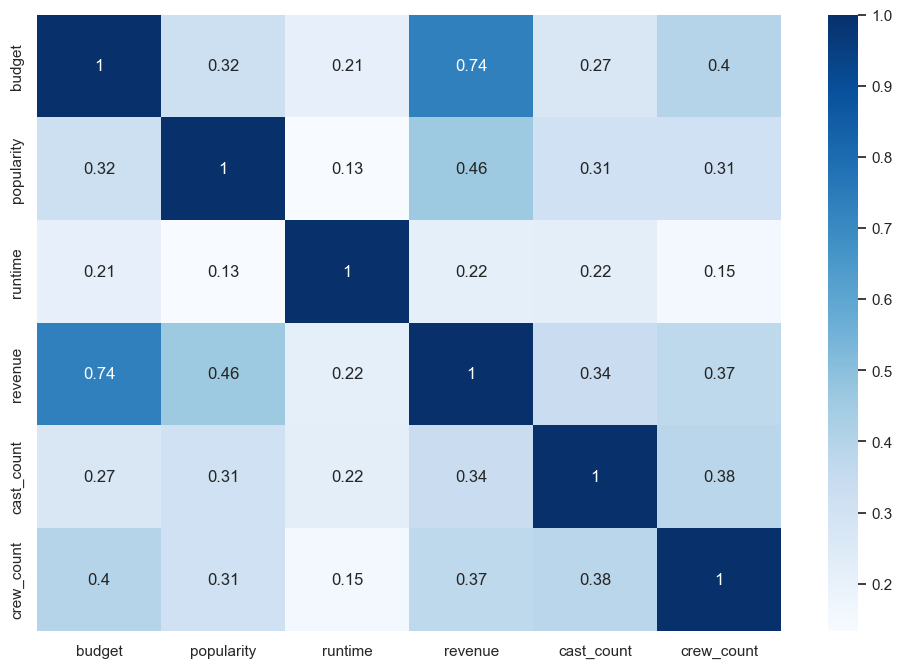

In [144]:
corr =df.corr()
top_feature = corr.index[abs(corr['revenue'])>0.2]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()

處理完train_data，我們用相同的判斷基準來處理test_data，所以就不多說明了

In [145]:
#df_test
df_test = pd.read_csv("test.csv")
df_test.head()

#test data explore
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

for col in dict_cols:    
    df_test[col] = df_test[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

na_cols = df_test.columns[df_test.isna().any()].tolist()
na_cols.remove('runtime')
df_test['runtime'].fillna(value=df_test['runtime'].median(), inplace=True)
for col in na_cols:    
    df_test[col].fillna(value='', inplace=True)


def get_name(x, col):
  
    names = []
    for item in x:
        names.append(item['name'])
    return names
    
for col in dict_cols:
    df_test[col] = df_test[col].apply(lambda x: get_name(x, col))

df_test.head()

#drop
df_test.drop(['belongs_to_collection'], axis=1, inplace=True)

#budget < 10000
len(df_test[df_test['budget'] < 10000])
#budget < 50000
len(df_test[df_test['budget'] < 50000])

#solve too many low budget
mean = df_test['budget'].mean()
df_test['budget'] = df_test['budget'].apply(lambda x : x+mean if x<50000 else x)
df_test['budget'].describe()

#count how many and type and drop genres
df_test['genre_count'] = df_test['genres'].apply(lambda x: len(x))
df_test['spoken_languages_count'] = df_test['spoken_languages'].apply(lambda x: len(x))
df_test['cast_count'] = df_test['cast'].apply(lambda x: len(x))
df_test['crew_count'] = df_test['crew'].apply(lambda x: len(x))


df_test.drop(['genres'], axis=1, inplace=True)
df_test.drop(['spoken_languages'], axis=1, inplace=True)
df_test.drop(['cast'], axis=1, inplace=True)
df_test.drop(['crew'], axis=1, inplace=True)


#then drop not-used data
df_test.drop(['homepage'], axis=1, inplace=True)
df_test.drop(['imdb_id'], axis=1, inplace=True)
df_test.drop(['poster_path'], axis=1, inplace=True)
df_test.drop(['production_countries'], axis=1, inplace=True)

#language
for i in df_test['original_language']:
    if(i=='en'):
        df_test['Has_En']=1
    else:
        df_test['Has_En']=0

df_test.drop(['original_language'], axis=1, inplace=True)




#production company
df_test['production_companies_count'] = df_test['production_companies'].apply(lambda x: len(x))
means = df_test['production_companies_count'].mean()
df_test["production_companies_count"] = df_test["production_companies_count"].apply(lambda x : x+means if x==0 else x)
df_test.drop(['production_companies'], axis=1, inplace=True)




#release date
df_test['release_date'].isnull().sum()

df_test.loc[df_test['release_date'].isnull()==True, 'release_date']= '5/1/00'
df_test[df_test["release_date"]== '5/1/00']
df_test["release_date"] = df_test["release_date"].replace('', '5/1/00')
df_test['release_date'] = pd.to_datetime(df_test['release_date'], format='%m/%d/%y')
df_test["release_year"] = pd.to_datetime(df_test["release_date"]).dt.year.astype(int)
df_test["release_day"] = pd.to_datetime(df_test["release_date"]).dt.dayofweek.astype(int)
df_test["release_month"] = pd.to_datetime(df_test["release_date"]).dt.month.astype(int)


df_test['release_year'].max()

def fix_dates(x):
    if x > 2023:
        return 2023
    else:
        return x 

df_test['release_year'] = df_test['release_year'].apply(lambda x: fix_dates(x))



#drop
df_test.drop(['original_title'], axis=1, inplace=True)
df_test.drop(['overview'], axis=1, inplace=True)
df_test.drop(['status'], axis=1, inplace=True)
df_test.drop(['tagline'], axis=1, inplace=True)
df_test.drop(['Keywords'], axis=1, inplace=True)
df_test.drop(['title'], axis=1, inplace=True)
df_test.drop(['release_date'], axis=1, inplace=True)

#overall
df_test.head()

,id,budget,popularity,runtime,genre_count,spoken_languages_count,cast_count,crew_count,Has_En,production_companies_count,release_year,release_day,release_month
0,3001,2.264929e+07,3.851534,90.0,4,2,7,2,0,2.776035,2007,5,7
1,3002,8.800000e+04,3.559789,65.0,2,1,10,8,0,1.000000,2023,6,5
2,3003,2.264929e+07,8.085194,100.0,2,1,9,10,0,3.000000,1997,4,5
3,3004,6.800000e+06,8.596012,130.0,3,3,23,69,0,3.000000,2010,5,9
4,3005,2.000000e+06,3.217680,92.0,2,1,4,14,0,2.776035,2005,4,2


首先，我們先用第一周教的LinearRegression先測試看看(linearRegression適合處理預測分析)

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [147]:
X=df[['budget','popularity','runtime']]
y=df['revenue']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.35)

regg=LinearRegression()
regg.fit(X_train, y_train)
prediction=regg.predict(X_test)

test_x=df_test[['budget','popularity','runtime']]
predicted_revenue=regg.predict(test_x)

my_submission4=pd.DataFrame({'id':df_test.id,'revenue':predicted_revenue})
my_submission4.to_csv('submission4.csv', index=False)

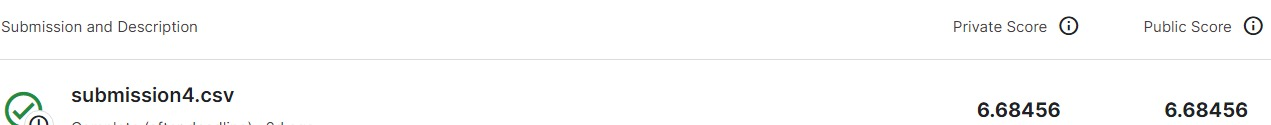

In [148]:
from IPython.display import Image
Image(filename='4.jpeg')
from IPython.display import display
display(Image(filename='4.jpeg'))

分數有點高，理論上愈低愈好，所以我們試著找尋其他方法

我們把更多元素加進去LinearRegression，測試看看

In [149]:
X2=df[['budget','popularity','runtime','genre_count','spoken_languages_count','cast_count','crew_count','Has_En','production_companies_count','release_year','release_day','release_month']]
y2=df['revenue']
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2, test_size=0.35)

regg=LinearRegression()
regg.fit(X2_train, y2_train)
prediction=regg.predict(X2_test)

test_x2=df_test[['budget','popularity','runtime','genre_count','spoken_languages_count','cast_count','crew_count','Has_En','production_companies_count','release_year','release_day','release_month']]
predicted_revenue=regg.predict(test_x2)

my_submission=pd.DataFrame({'id':df_test.id,'revenue':predicted_revenue})
my_submission.to_csv('submission.csv', index=False)

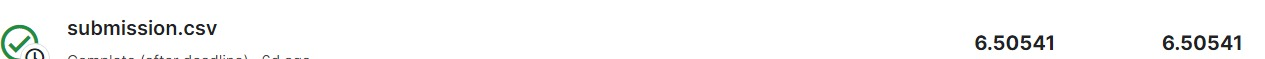

In [150]:
from IPython.display import Image
Image(filename='1.jpeg')
from IPython.display import display
display(Image(filename='1.jpeg'))

分數降下來了，代表方向有對，但是還是太高，所以勢必要繼續找其他方法，我們試著把優先順序低的項目刪掉，像是上面有講到的月和日等欄位，然後再測試一次

In [151]:
X=df[['budget','popularity','runtime','genre_count','cast_count','crew_count','Has_En','release_year']]
y=df['revenue']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.35)

regg=LinearRegression()
regg.fit(X_train, y_train)
prediction=regg.predict(X_test)

test_x=df_test[['budget','popularity','runtime','genre_count','cast_count','crew_count','Has_En','release_year']]
predicted_revenue=regg.predict(test_x)

my_submission5=pd.DataFrame({'id':df_test.id,'revenue':predicted_revenue})
my_submission5.to_csv('submission5.csv', index=False)

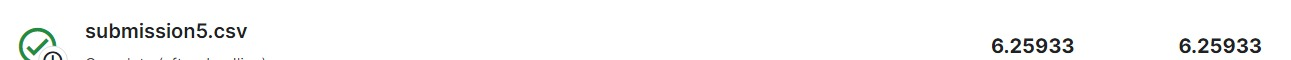

In [152]:
from IPython.display import Image
Image(filename='5.jpeg')
from IPython.display import display
display(Image(filename='5.jpeg'))

又更進步一些，可以得知欄位的優先順序也有關係，我們上面corr就可以告訴我們優先程度的差別，但是這樣還不夠

我試著詢問chatgpt該用何種模型增進，得出了RandomForestRegressor

甚麼是RandomForestRegressor? 

RandomForestRegressor 是一種機器學習模型，用於解決迴歸問題。它是一種集成學習模型，使用多個決策樹進行預測，並將這些決策樹的預測結果進行平均或投票得到最終的預測結果。隨機森林迴歸器的原理是建立一個由多個決策樹組成的森林，每棵決策樹都使用不同的訓練數據子集和特徵子集進行訓練，以避免過擬合。在預測時，將所有決策樹的預測結果進行平均或投票，得到最終的預測結果。RandomForestRegressor 可以用於解決各種迴歸問題，例如預測房價、股票價格等。在實際應用中，它通常會和其他技術一起使用，例如特徵工程、交叉驗證等，以提高模型的準確度。

參考chatgpt的解釋，可以得知這組模型蠻適合用在預測分析，剛好跟這個主題契合，所以趕緊來試試看

延伸學習:

(RandomForestRegressor) : https://zhuanlan.zhihu.com/p/148612418


In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
X1=df[['budget','popularity','runtime','genre_count','spoken_languages_count','cast_count','crew_count','Has_En','production_companies_count','release_year','release_day','release_month']]
y1=df['revenue']
X_train, X_test, y_train, y_test=train_test_split(X1,y1, train_size=0.8,test_size=0.2,random_state=1)


X_train = df[['budget','popularity','runtime','genre_count','spoken_languages_count','cast_count','crew_count','Has_En','production_companies_count','release_year','release_day','release_month']]
Rf_model=RandomForestRegressor(random_state=1)
Rf_model.fit(X_train,y1)
Rf_prediction=Rf_model.predict(X_train)
mean_absolute_error(Rf_prediction,y)
r2_score(Rf_prediction,y)

test_id=df_test["id"]
test_id.shape
test_x1=df_test[['budget','popularity','runtime','genre_count','spoken_languages_count','cast_count','crew_count','Has_En','production_companies_count','release_year','release_day','release_month']]
Rf_predictions=Rf_model.predict(test_x1)

my_submission2 = pd.DataFrame({'id': test_id, 'revenue':Rf_predictions})
my_submission2 = my_submission2[['id', 'revenue']]

my_submission2.to_csv("submission2.csv", index=False)

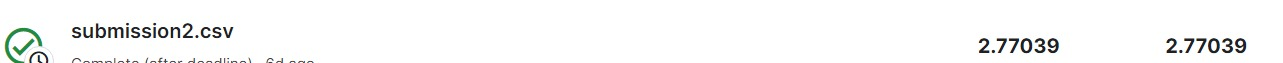

In [154]:
from IPython.display import Image
Image(filename='2.jpeg')
from IPython.display import display
display(Image(filename='2.jpeg'))

可以看到大幅下降，可以得出結論，對於多種欄位的影響，似乎使用這個會比較好，但是當然離最好的結果0.6還是有點差距，所以我們再試著試試看提供重要欄位就好

In [155]:
X1=df[['budget','popularity','runtime',]]
y1=df['revenue']
X_train, X_test, y_train, y_test=train_test_split(X1,y1, train_size=0.8,test_size=0.2,random_state=1)


X_train = df[['budget','popularity','runtime']]
Rf_model=RandomForestRegressor(random_state=1)
Rf_model.fit(X_train,y1)
Rf_prediction=Rf_model.predict(X_train)
mean_absolute_error(Rf_prediction,y)
r2_score(Rf_prediction,y)

test_id=df_test["id"]
test_id.shape
test_x1=df_test[['budget','popularity','runtime']]
Rf_predictions=Rf_model.predict(test_x1)

my_submission3 = pd.DataFrame({'id': test_id, 'revenue':Rf_predictions})
my_submission3 = my_submission3[['id', 'revenue']]

my_submission3.to_csv("submission3.csv", index=False)

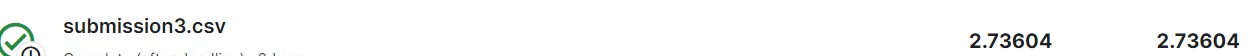

In [156]:
from IPython.display import Image
Image(filename='3.jpeg')
from IPython.display import display
display(Image(filename='3.jpeg'))

有些微下降，所以跟linear相反，linear多一點資料可能比較好(當然還是要比較重要的欄位)，但是forest取更重要的前三個欄位，反而會讓分數變得更好

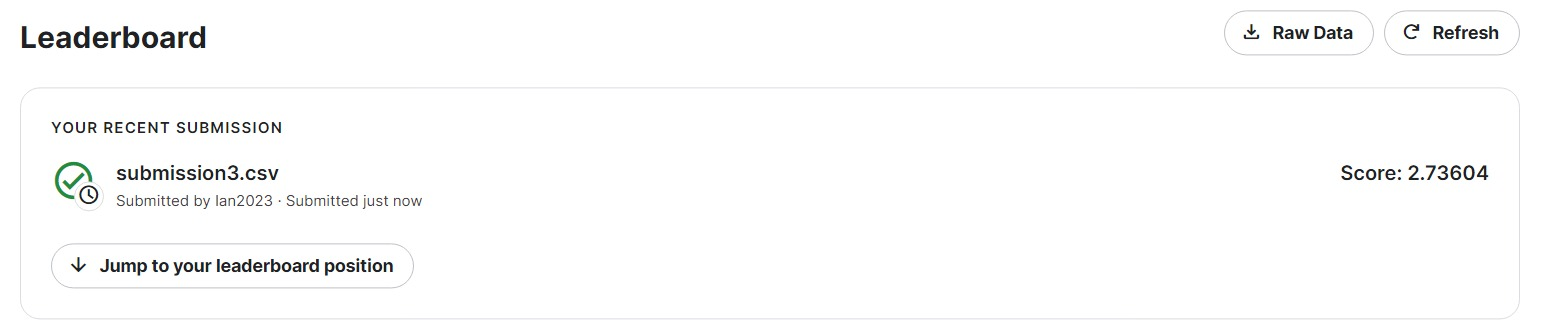

In [157]:
from IPython.display import Image
Image(filename='final.jpeg')
from IPython.display import display
display(Image(filename='final.jpeg'))

最終我就以這個為最終結果，排名在1000名，雖然總共隊伍是1395，可以得知結果不太好，可以看出來我似乎還沒能完全掌握關鍵影響票房的數據，或是在整理資料時，沒能把原有的資料轉成有用的資訊，像是如果我能夠判斷genres的字來跟票房連接，而不是單純算有多少個，或許分數就能再進步一些，同理cast,crew一樣，畢竟從現實層面來看，我們或多或少會因為喜歡的演員和導演進去觀賞電影，所以如果未來能夠判斷字的關係，或許成績就能再進步一些。過程中我也學習到很多新的東西，希望未來能夠運用這次的經驗，來幫助期末專題的準備。